# Lector de matricules
#### v1
L'objectiu d'aquest notebook es fer un proof of concept de la pipeline.

Aquesta pipeline s'encarregara de fer:
* Obtenir les imatges
* Llegir imatges
* Carregar el model YoLo v5
* Fer inferencia en les imatges
* Desar valors

# 0. Imports

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torchvision
from PIL import Image
import pandas as pd

In [2]:
# Reqs

# # Script for downloading and installing compatible versions.
# # Download the required packages and versions
# !wget https://download.pytorch.org/whl/cu111/torch-1.8.1%2Bcu111-cp39-cp39-linux_x86_64.whl
# !wget https://download.pytorch.org/whl/cu111/torchvision-0.9.1%2Bcu111-cp39-cp39-linux_x86_64.whl
# # Install the packages    
# !pip install torch-1.8.1+cu111-cp39-cp39-linux_x86_64.whl
# !pip install torchvision-0.9.1+cu111-cp39-cp39-linux_x86_64.whl

# 1. Obtencio d'imatges
Es procedira a descarregar imatges des de repositoris publics amb llicencia permissiva.

In [2]:
# Set base image directory
root = os.getcwd()
base_imdir = os.path.join(root,"pipeline-check")
print("Root directory: {}".format(root))

Root directory: /home/noone/smartcatalonia-2021/lector-matricules


In [3]:
# Lookup all files in the image directory
(_,_,filenames) = next(os.walk(base_imdir))

In [4]:
print(filenames)

['buses.jpg', 'moto.jpg', 'embus-barcelona.jpg', '3342836.jpg']


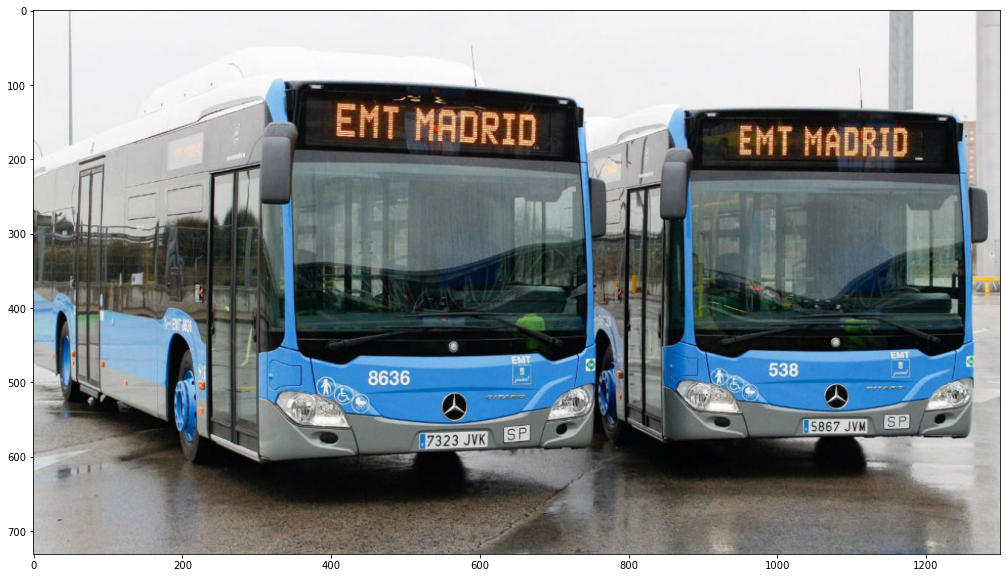

In [5]:
# Show the first image in the list
img_dir = os.path.join(base_imdir,filenames[0])
img = cv2.imread(img_dir)

plt.figure(figsize=[20,10])
plt.imshow(img[:,:,::-1])
plt.show()

In [6]:
print("PyTorch {} and Torchvision {} on ({})".format(torch.__version__,torchvision.__version__,torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'))

if torch.__version__.split('+')[-1] != torchvision.__version__.split('+')[-1]:
    print("Incompatible versions of pytorch and torchvision for YoLo-v5")

PyTorch 1.8.1+cu111 and Torchvision 0.9.1+cu111 on (GeForce RTX 2070)


In [7]:
# Load model from torch hub
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /home/noone/.cache/torch/hub/master.zip

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Focus                     [3, 32, 3]                    
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1    156928  models.common.C3                        [128, 128, 3]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  1    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1

Adding autoShape... 


In [8]:
# List images to infer
imgs = []
imgs = [os.path.join(base_imdir,image) for image in filenames]

print("The number of images to run inference into is {}".format(len(imgs)))

The number of images to run inference into is 4


In [9]:
# Do the inference
results = model(imgs, size=640)

In [10]:
# Results
results.print()
results.save()

image 1/4: 731x1300 1 person, 2 buss
image 2/4: 601x1068 1 person, 1 motorcycle
image 3/4: 453x680 2 persons, 23 cars, 2 motorcycles, 1 truck
image 4/4: 480x640 5 persons, 1 motorcycle, 1 truck
Speed: 11.5ms pre-process, 110.5ms inference, 3.9ms NMS per image at shape (4, 3, 480, 640)
Saved buses.jpg, moto.jpg, embus-barcelona.jpg, 3342836.jpg to runs/hub/exp6


In [11]:
# Directory where experiments of inferenced images are saved
inf_dir = os.path.join(root,"runs/hub")

# Search for the latest experiment directory
# List all the experiment dirs
(_, exp_dirs, _) = next(os.walk(inf_dir))

# Impute a 0 for the first experiment, which does not come with a number
exp_dirs[0] = "exp0"

# Run through all the experiment directories and extract the order
all_exp=[int(exp_dir.split("exp")[-1]) for exp_dir in exp_dirs if len(exp_dirs) > 1]

# Select the last experiment dir
last_exp = max(all_exp)
last_exp_dir = os.path.join(inf_dir,"exp"+str(last_exp))

# Lookup all files in the experiment directory
(_, _, inf_files) = next(os.walk(last_exp_dir))

# List the images with its full path
inf_imgs = []
inf_imgs = [os.path.join(last_exp_dir,image) for image in inf_files]

/home/noone/smartcatalonia-2021/lector-matricules/runs/hub/exp6/buses.jpg
/home/noone/smartcatalonia-2021/lector-matricules/runs/hub/exp6/moto.jpg
/home/noone/smartcatalonia-2021/lector-matricules/runs/hub/exp6/embus-barcelona.jpg
/home/noone/smartcatalonia-2021/lector-matricules/runs/hub/exp6/3342836.jpg


<ipython-input-12-0a33b23440d4>:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


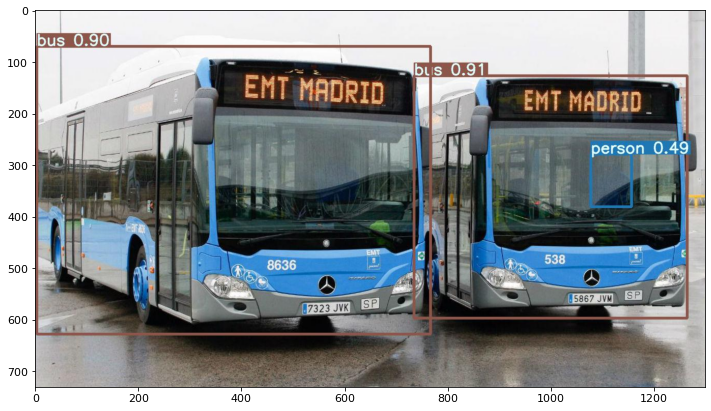

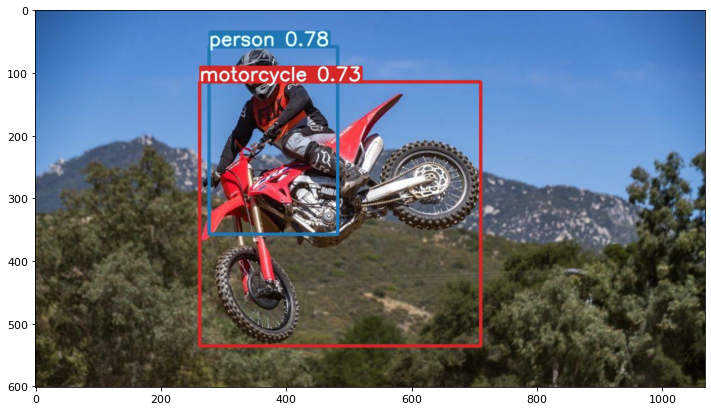

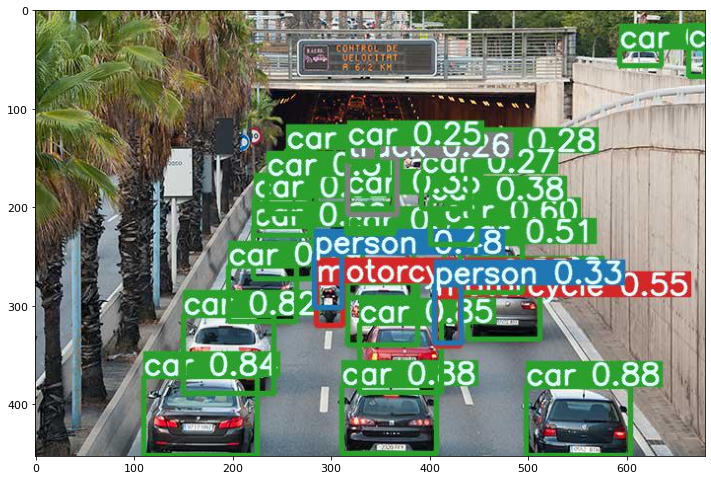

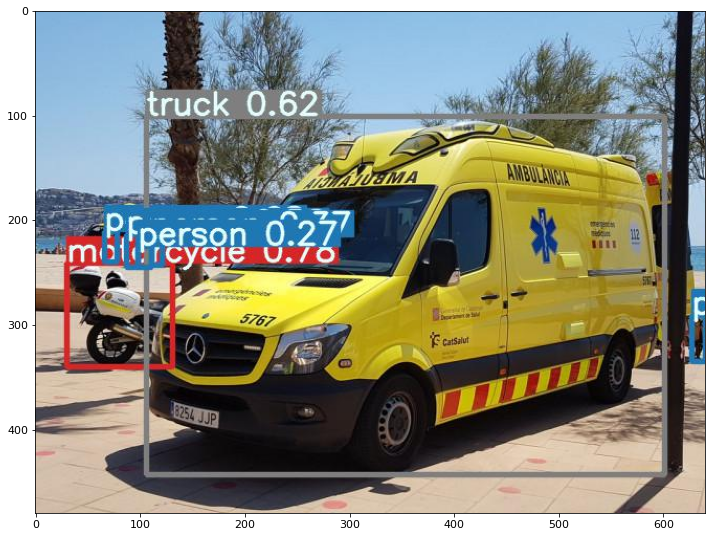

In [12]:
# Show all the images
for i,image in enumerate(inf_imgs):
    print(image)
    fig = plt.figure(figsize=(12,12))
    img = cv2.cvtColor(cv2.imread(image),cv2.COLOR_BGR2RGB)
    plt.imshow(img)
plt.show()

In [13]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

fatal: destination path 'yolov5' already exists and is not an empty directory.
/home/noone/smartcatalonia-2021/lector-matricules/yolov5
Note: you may need to restart the kernel to use updated packages.


In [14]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.8.1+cu111 (GeForce RTX 2070)


In [16]:
!python detect.py --weights yolov5x.pt --img 640 --conf 0.5 --source /home/noone/smartcatalonia-2021/lector-matricules/pipeline-check

Namespace(weights=['yolov5x.pt'], source='/home/noone/smartcatalonia-2021/lector-matricules/pipeline-check', img_size=640, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False)
YOLOv5 🚀 v5.0-14-g238583b torch 1.8.1+cu111 CUDA:0 (GeForce RTX 2070, 7982.3125MB)

Fusing layers... 
Model Summary: 476 layers, 87730285 parameters, 0 gradients, 218.8 GFLOPS
image 1/4 /home/noone/smartcatalonia-2021/lector-matricules/pipeline-check/3342836.jpg: 480x640 3 persons, 1 motorcycle, 1 truck, Done. (0.038s)
image 2/4 /home/noone/smartcatalonia-2021/lector-matricules/pipeline-check/buses.jpg: 384x640 2 persons, 2 buss, Done. (0.029s)
image 3/4 /home/noone/smartcatalonia-2021/lector-matricules/pipeline-check/embus-barcelona.jpg: 448x640 2 persons, 13 cars, 3 motorcycles, Done. (0.035s)
image 4/4 /home/noone/smartcatalonia-2021/lector-matri

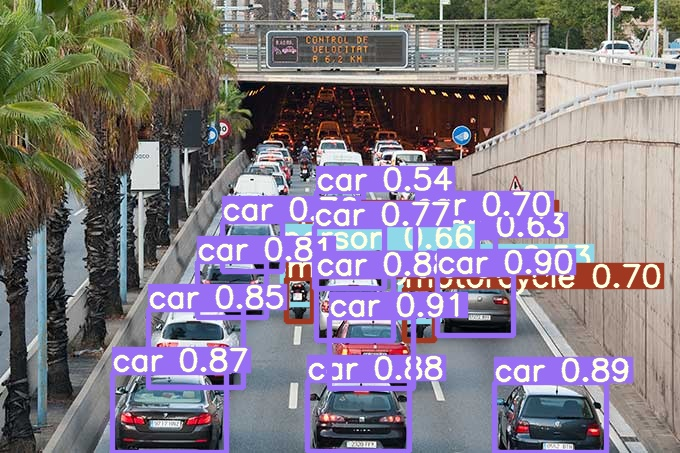

In [17]:
Image(filename='runs/detect/exp9/embus-barcelona.jpg', width=600)

In [18]:
# Install kaggle package for dataset downloading
!pip install kaggle --upgrade --quiet

In [21]:
os.chdir(root)

if not os.path.isdir("datasets"):
    os.mkdir("datasets")

os.chdir("datasets")

# Download kaggle dataset for license plate detection
if not os.path.isdir("car-plate-detection"):
    os.mkdir("car-plate-detection")
    os.chdir("car-plate-detection")
    !kaggle datasets download -d andrewmvd/car-plate-detection
    # Extract the files
    !unzip -q car-plate-detection.zip
    !rm car-plate-detection.zip

In [102]:
# Read xml file into a dictionary

# Set the working paths
data_path = os.path.join(root,"datasets","car-plate-detection")
img_path = os.path.join(data_path,"images")
ann_path = os.path.join(data_path,"annotations")

# Do a swipe and get all the xml files with annotations
(_,_,xmlfiles) = next(os.walk(ann_path))

os.chdir(ann_path)
ann_dict = {"filename": [],
            "filepath": [],
            "xmin": [],
            "xmax": [],
            "ymin": [],
            "ymax": [],
            "height": [],
            "width":[],
            "x": [],
            "y": []
           }

# Enter each xml file discovered, get some data and store it in the dictionary
for xmlfile in xmlfiles:
    with open(xmlfile) as file:
        data = file.read()
        
        # String extraction of the important data
        filename = data.split("<filename>")[-1].split("</filename>")[0]
        filepath = os.path.join(img_path,filename)
        xmin = int( data.split("<xmin>")[-1].split("</xmin>")[0] )
        xmax = int( data.split("<xmax>")[-1].split("</xmax>")[0] )
        ymin = int( data.split("<ymin>")[-1].split("</ymin>")[0] )
        ymax = int( data.split("<ymax>")[-1].split("</ymax>")[0] ) 
        height = int( data.split("<height>")[-1].split("</height>")[0] )
        width = int( data.split("<width>")[-1].split("</width>")[0] )
        
        # Normalized center of the bounding box in both axis
        x = ((xmax-xmin)/2 + xmin) / width
        y = ((ymax-ymin)/2 + ymin) / height
        
        # Normalized height and width
        height
        
        # Writing into dictionary
        ann_dict["filename"].append(filename)
        ann_dict["filepath"].append(filepath)
        ann_dict["xmin"].append(xmin)
        ann_dict["xmax"].append(xmax)
        ann_dict["ymin"].append(ymin)
        ann_dict["ymax"].append(ymax)
        ann_dict["height"].append(height)
        ann_dict["width"].append(width)
        ann_dict["x"].append(x)
        ann_dict["y"].append(y)

In [103]:
# Convert dictionary to DF and export as CSV
os.chdir(data_path)
ann_df = pd.DataFrame.from_dict(ann_dict)
ann_df.to_csv("annotations.csv",index=False)

In [106]:
# Label creation
label_path = os.path.join(data_path,"labels")

label_df = pd.read_csv("annotations.csv",usecols=["filename","x","y","width","height"])

label_df

,filename,height,width,x,y
0,Cars310.png,531,600,0.490833,0.740113
1,Cars378.png,307,400,0.465000,0.372964
2,Cars258.png,266,400,0.485000,0.781955
3,Cars33.png,225,400,0.500000,0.500000
4,Cars152.png,300,467,0.311563,0.903333
...,...,...,...,...,...
428,Cars269.png,300,400,0.321250,0.693333
429,Cars57.png,242,431,0.685615,0.737603
430,Cars249.png,247,400,0.817500,0.878543
431,Cars128.png,225,400,0.522500,0.528889
